### Import module

In [1]:
from Cross_react import * 

### Load data
Load genotype data and proteins sequences. For example, we use test data of genotype frequences in the population and sequences of Rabius virus G protein.

In [2]:
test_genotypes = 'test_HLA.tsv'
pseq_A = "MVPQALLFVPLLVFPLCFGKFPIYTIPDKLGPWSPIDIHHLSCPNNLVVEDEGCTNLSGFSYMELKVGYILAIKMNGFTCTGVVTEAENYTNFVGYVTTTFKRKHLRPTPDACRAAYNWKMAGDPRYEESLHNPYPDYSWLRTVKTTKESLVIISPSVADLDPYDRSLHSRVFPSGKCSGVAVSSTYCSTNHDYTIWMPENPRLGKSCDIFTNSRGKRASKGSETCGFVDERGLYKSLKGACKLKLCGVLGLRLMDGTWVAMQTSNETKWCPPDQLVNLHDFRSDEIEHLVVEELVRKREECLDALESIMTTKSVSFRRLSHLRKLVPGFGKAYTIFNKTLMEADAHYKSVRTWNEILPSKGCLRVGGRCHPHVNGVFFNGIILGPDGNVLIPEMQSSLLQQHMELLESSVIPLVHPLADPSTVFKDGDEAEDFVEVHLPDVHNQVSGVDLGLPNWGKYVLLSAGALTALMLIIFLMTCCRRVNRSEPTQHNLRGTGREVSVTPQTWKIISSWESHKSGGETRL"
pseq_B = "MVPQVLLFAPLLVFPLCFGKFPIYTIPDKLGPWSPIDLHHLSCPNNLVVEDEGCTNLSGFSYMELKVGYISAIKVNGFTCTGVVTEAETYTNFVGYVTTTFKRKHFRPTPDACRAAYNWKMAGDPRYEESLHNPYPDYHWLRTVKTTKESLVIISPSVTDLDPYDKSLHSRVFPGGNCSGITVSSTYCSTNHDYTIWMPENLRLGTSCDIFTHSRGKRASKGDKTCGFVDERGLYKSLKGACKLKLCGVLGLRLMDGTWVAMQTSDETKWCPPGQLVNLHDFRSDEIEHLVEEELVKKREECLDALESIMTTKSVSFRRLSHLRKLVPGFGKAYTIFNKTLMEADAHYKSVQTWNEIIPSKGCLRVGERCHPHVNGVFFNGIILGSDGHVLIPEMQSSLLQQHMELLESSVIPLMHPLADPSTVFKDGDEVEDFVEVHLPDVHKQVSGVDLGLPKWGKYVLMIAGALIALMLIIFLMTCCRRVNRPESTQSNLGGTGRNVSVPSQSGKVISSWESYKSGGETRL"
pseq_C = "MVPQALLFVPLLVFPLCFGKFPIYTIPDKLGPWSPIDIHHLSCPNNLVVEDEGCTNLSGFSYMELKVGYISAIKMNGFTCTGVVTEAETYTNFVGYVTTTFKRKHFRPTPDACRAAYNWKMAGDPRYEESLHNPYPDYHWLRTVKTTKESLVIISPSVADLDPYDRSLHSRVFPGGNCSGVAVSSTYCSTNHDYTIWMPENPRLGMSCDIFTNSRGKRASKGSETCGFVDERGLYKSLKGACKLKLCGVLGLRLMDGTWVAMQTSNETKWCPPGQLVNLHDFRSDEIEHLVVEELVKKREECLDALESIMTTKSVSFRRLSHLRKLVPGFGKAYTIFNKTLMEADAHYKSVRTWNEIIPSKGCLRVGGRCHPHVNGVFFNGIILGPDGNVLIPEMQSSLLQQHMELLVSSVIPLMHPLADPSTVFKNGDEAEDFVEVHLPDVHERISGVDLGLPNWGKYVLLSAGALTALMLIIFLMTCWRRVNRSEPTQHNLRGTGREVSVTPQSGKIISSWESYKSGGETGL"


### Initilaze all main classes
* If you clone IEPAPI repo to 'T-cell-immunity/' folder and run your code from it, all the necessary paths will be determined automatically. However, you can specify them manually through the appropriate arguments
* All supported alleles are contained in the IEPAPI database (data/pseudoSequence(ELIM).csv file). If necessary, you can use your database during initialization Population and IEPAPI_immunogenecity_predictor classes

In [3]:
immun_predictor = IEPAPI_immunogenicity_predictor()
cross_react_predictor = BATMAN_predictor()
Popul = Population(test_genotypes)
protein_A = Protein(pseq_A)
protein_B = Protein(pseq_B)
protein_C = Protein(pseq_C)

/home/orlov.av/anaconda3/envs/BATMAN/lib/python3.11/site-packages/pymc/distributions/transforms.py:53: FutureWarning: univariate_ordered has been deprecated, use ordered instead.
  warnings.warn(f"{name} has been deprecated, use ordered instead.", FutureWarning)
/home/orlov.av/anaconda3/envs/BATMAN/lib/python3.11/site-packages/pytensor/link/c/cmodule.py:2959: UserWarning: PyTensor could not link to a BLAS installation. Operations that might benefit from BLAS will be severely degraded.
This usually happens when PyTensor is installed via pip. We recommend it be installed via conda/mamba/pixi instead.
Alternatively, you can use an experimental backend such as Numba or JAX that perform their own BLAS optimizations, by setting `pytensor.config.mode == 'NUMBA'` or passing `mode='NUMBA'` when compiling a PyTensor function.
For more options and details see https://pytensor.readthedocs.io/en/latest/troubleshooting.html#how-do-i-configure-test-my-blas-library
  warnings.warn(


Output()

Shape validation failed: input_shape: (1, 50000), minimum_shape: (chains=2, draws=4)


Warning! The genotype ['A*11:01:01', 'A*24:191', 'B*07:02:01', 'B*07:02:01', 'C*07:02:01', 'C*07:02:01'] was removed because it contains unknown alleles
Warning! The genotype ['A*03:26', 'A*03:26'] was removed because it contains unknown alleles
Warning! The genotype ['A*24:486', 'A*24:486'] was removed because it contains unknown alleles
Warning! The genotype ['A*24:260', 'A*24:50', 'C*07:02:01', 'C*07:616'] was removed because it contains unknown alleles
Warning! The genotype ['A*11:01:01', 'A*11:373'] was removed because it contains unknown alleles
Warning! The genotype ['A*03:01:01', 'A*03:12', 'B*07:02:01', 'B*07:326', 'C*07:154', 'C*07:912'] was removed because it contains unknown alleles
Warning! The genotype ['A*23:17:03', 'A*24:02:01'] was removed because it contains unknown alleles
Warning! The genotype ['A*03:322', 'A*03:331', 'B*07:382', 'B*07:403'] was removed because it contains unknown alleles
Warning! The genotype ['A*03:01:01', 'A*03:01:01', 'B*07:02:59', 'B*07:381', '

### Calculation of cross-reactivity between proteins
To calculate multiple cross-recativity between 2 proteins you can use function Cross_react_predict wich returns a list with distribution of cross-reactivity for each individual. To specify individuals, you can pass as a "genotype" argument an object of the class Population and the number of individuals as a "N_individuals" argument. You can also pass a list with fixed genotypes as a "genotype" argument


The Cross_react_plot function create a plot with cross_reactivity distributions. You can specify 2 or 3 proteins to plot 1 or 2 cross_reactivity boxplots 

In [ ]:
Cross_react_predict(protein_A, protein_B, Popul, immun_predictor, cross_react_predictor, N_individuals=5)

100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


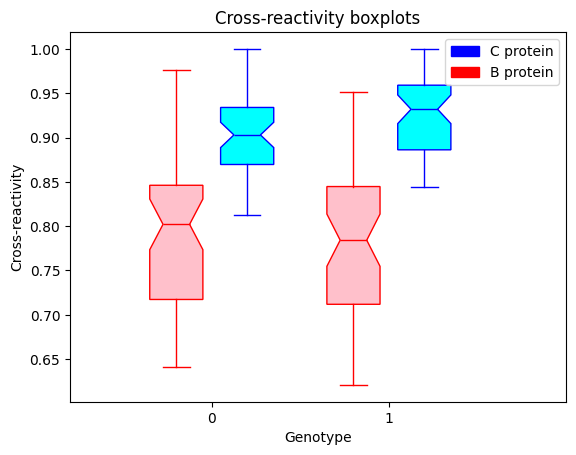

In [5]:
Cross_react_plot(Popul, immun_predictor, cross_react_predictor,protein_A,protein_B,protein_C, N_individuals=2)